<h1 align="center">Devoir UE n°6 - Notebook Jupyter</h1> 
<h4 align="center">Ru WANG</h4> 
<h4 align="center">October 29, 2022</h4> 

## Projet 2

### 2.1 Nous allons travailler ici avec un jeu de données relatif au cancer du sein. Il s’agit en définitive, à partir notamment de variables comme le rayon moyen (radius mean), et le nombre de points concaves (concave points mean), de déterminer si la tumeur est bégnine ou maligne. Vous trouverez davantage d’informations sur le jeux de données https://www.kaggle.com/datasets/uciml/breast-cancerwisconsin-data?resource=download à cette adresse

#### 1.Divisez aléatoirement le jeu de données via train test split, en suivant le ratio suivant : 80% pour l’entraînement, et 20% pour le test. La base d’entraînement sera nommée X train et ne comprendra que les ”features” (i.e., pas l’information permettant de déterminer si la tumeur est bégnine ou maligne), tandis que y train comportera les ”labels”. A ce stade, vous n’utiliserez que radius mean, et le nombre de points concaves (concave points mean) comme variables pour l’entraînement. Dans le cas de y train, vous ferez en sorte que la valeur 1 soit attribuée aux tumeurs malignes, et 0 aux bégnines. Vous construirez ensuite X test et y test de manière analogue.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re, seaborn as sns
import plotly.express as px

cancer = pd.read_csv("breast cancer.csv", low_memory = False, encoding = "latin-1")
print( cancer.head() )

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [6]:
cancer.shape

(569, 33)

In [8]:
cancer.drop(['Unnamed: 32','id'], axis = 1, inplace = True)

In [9]:
cancer['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [10]:
cancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [11]:
cancer.isnull().sum().sum()

0

In [12]:
cancer.duplicated().sum()

0

In [14]:
cancer['diagnosis'].replace({'M' : 1, 'B' : 0}, inplace = True)

In [15]:
y = cancer.pop('diagnosis')
X = cancer.copy()

In [16]:
X.shape
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [19]:
df=X[["radius_mean","concave points_mean"]]

#### 2. Importez DecisionTreeClassifier depuis sklearn.tree (pour les Pythonants)
#### 3. Instanciez un classifieur nommé dt. La profondeur maximale de l’arbre doit etre de 6. Définissez une seed à 1 (random state=1) afin d’obtenir des résultats reproductibles
#### 4.Entraïnez dt sur le jeu de données d’entraınement (X train et y train)

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.2,stratify=y,random_state=1)
dt=DecisionTreeClassifier(max_depth=6,random_state=1)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)


#### 5.Une fois dt entrainé, utilisez-le pour prédire le caractère bénin ou malin des tumeurs, puis affichez les résultats pour les cinq premières valeurs

In [79]:
import itertools
test=y_test.values.reshape(-1,1)
y_test1=list(itertools.chain.from_iterable(test))

print( '1 represent malin et 0 represent Bénin'  )
print( "prediction  "+ str(y_pred[0:5]) )

print( "en réalité   "  + str(y_test1[0:5]) )


1 represent malin et 0 represent Bénin
prediction  [0 0 0 1 0]
en réalité   [1, 0, 0, 1, 0]


#### 6.Affichez l’arbre de classification correspondant

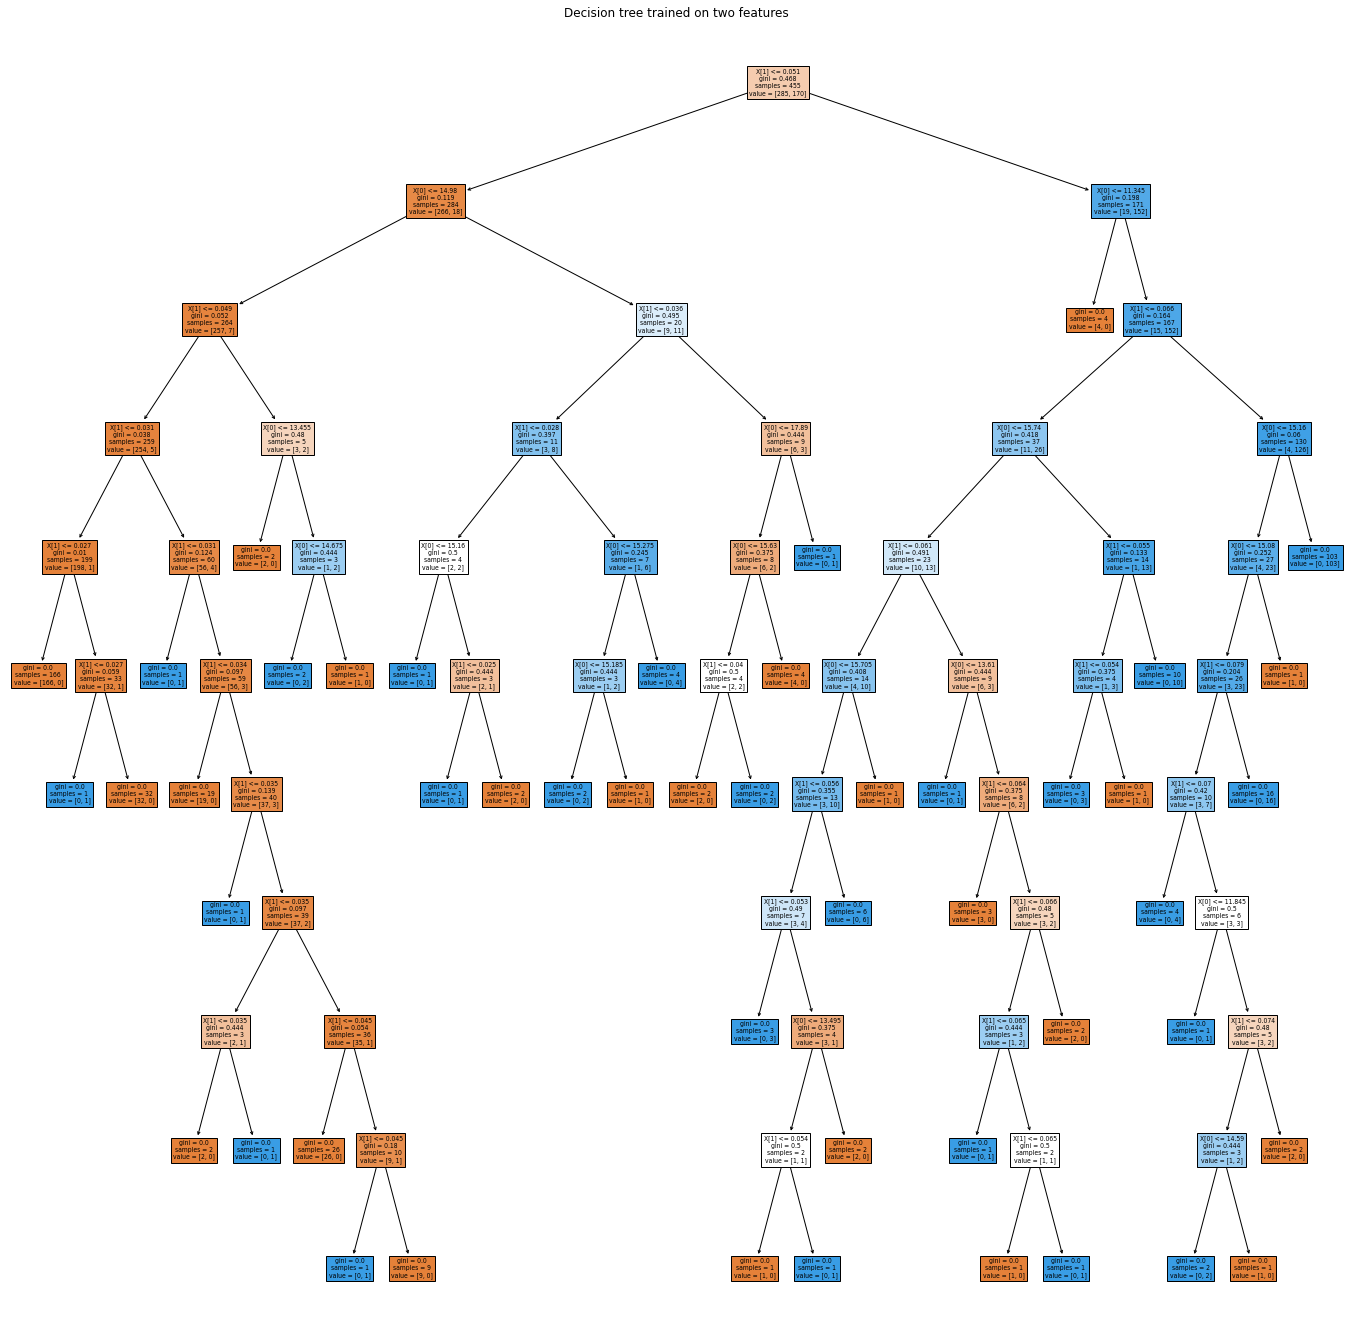

In [77]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24, 24))
clf=DecisionTreeClassifier().fit(X_train,y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on two features")
plt.show()

### 3.2 Exercice 2 : Evaluation d’un arbre, choix du critère d’information.  

#### Dans cette section, nous vous demandons d’évaluer le modèle ainsi créé en vous basant sur le pourcentage de prédictions correctes (accuracy score)

#### 1. Importez accuracy score depuis sklearn.metrics (ou son équivalent R)
#### 2. Nommez y pred la prédiction réalisée à partir de X test
#### 3. Affichez la valeur de la métrique de performance

In [80]:
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.2,stratify=y,random_state=1)
dt=DecisionTreeClassifier(max_depth=6,random_state=1)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.8859649122807017

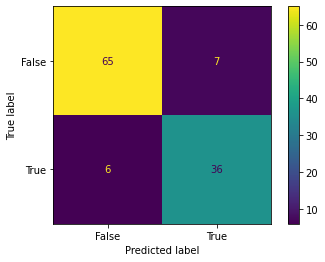

0.8859649122807017


In [83]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
Accuracy = metrics.accuracy_score(y_test, y_pred)
print(Accuracy)

In [85]:
(36+65)/(65+7+6+36)

0.8859649122807017

#### 4. Construisez maintenant deux arbres en vous basant sur l’ensemble des features disponibles dans le jeu de données, l’un mobilisant l’entropie comme critère d’information, et le second mobilisant l’indice de Gini

In [87]:
from sklearn.tree import DecisionTreeClassifier
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=1)
dt_entropy = DecisionTreeClassifier(max_depth=6, criterion='entropy', random_state=1)
dt_entropy.fit(X_train, y_train)
y_pred= dt_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test,y_pred)
print("entropy accuracy " + str(accuracy_entropy))

dt_gini = DecisionTreeClassifier(max_depth=6, criterion='gini', random_state=1)
dt_gini.fit(X_train, y_train)
y_pred= dt_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test,y_pred)
print("gini accuracy " + str(accuracy_gini))

entropy accuracy 0.9298245614035088
gini accuracy 0.9298245614035088


#### 5. Expliquez les principales différences entre les deux métriques

The Gini Index and the Entropy have two main differences:

1.Gini Index has values inside the interval [0, 0.5] whereas the interval of the Entropy is [0, 1]. 
2.Computationally, entropy is more complex since it makes use of logarithms and consequently, the calculation of the Gini Index will be faster.

#### 6. Affichez les arbres de classification correspondants
#### 7. Comparez les deux approches en utilisant la métrique de performance précédente

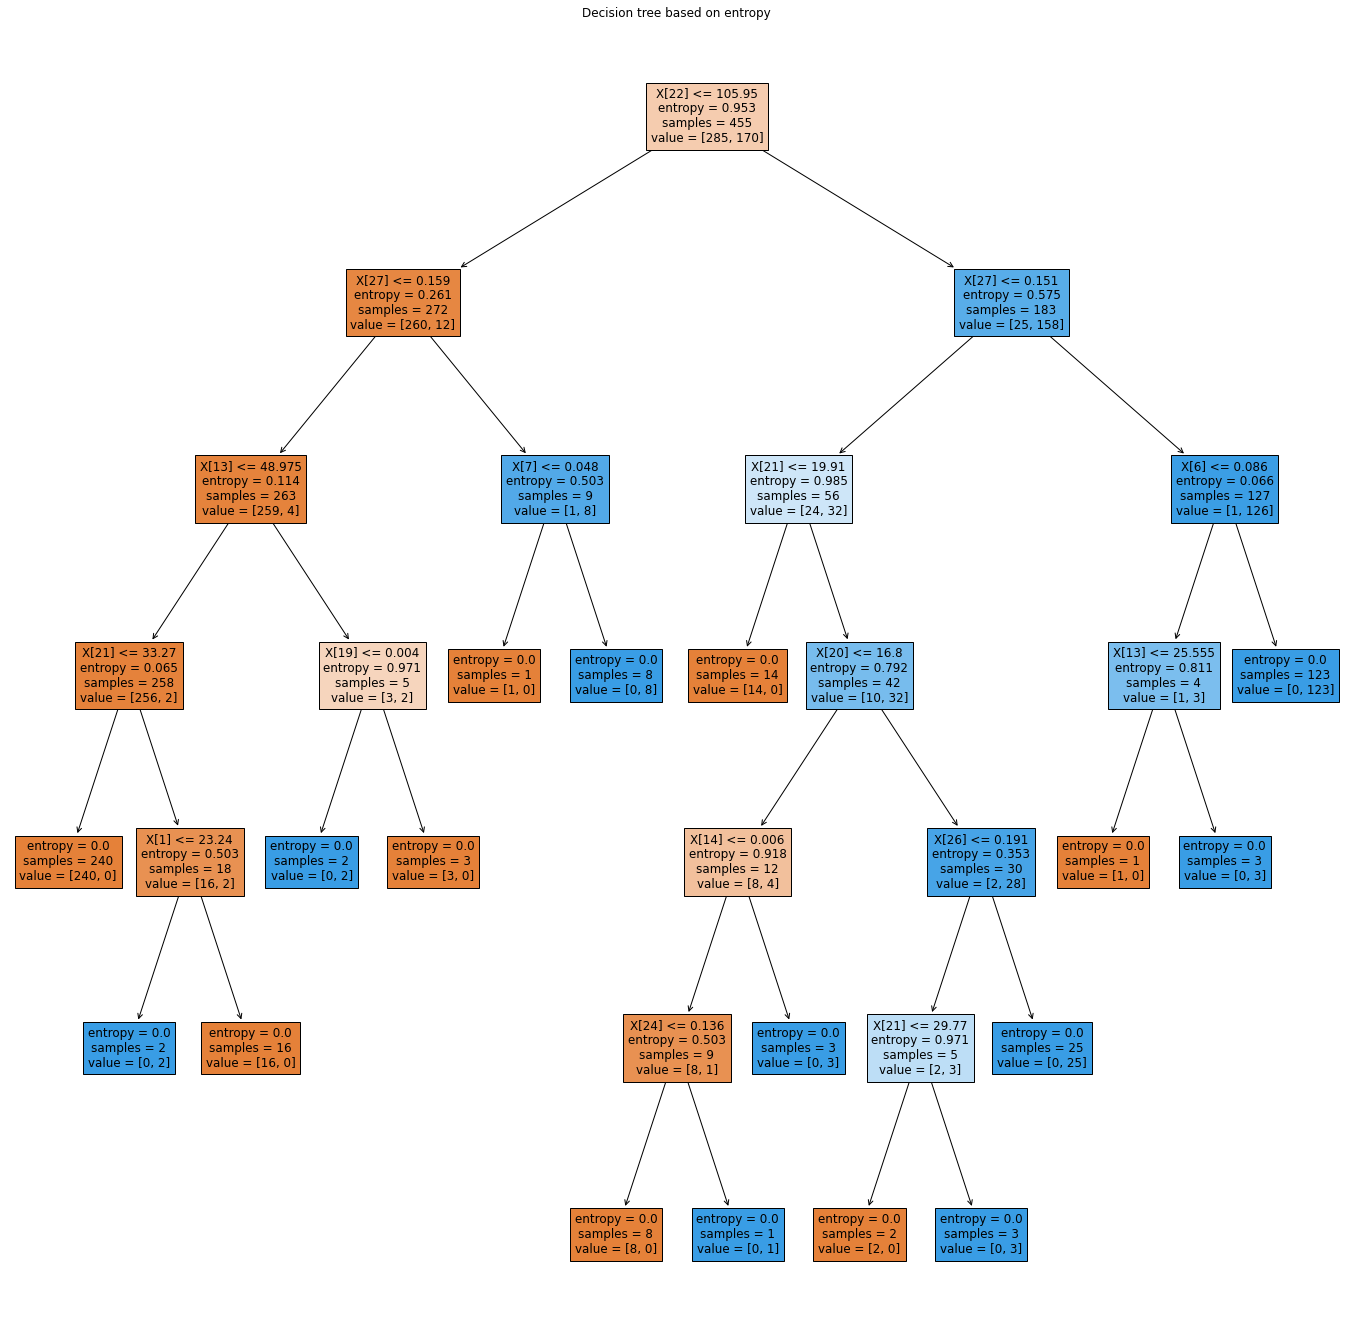

accuracy_entropy 0.9298245614035088


In [92]:
from sklearn.tree import plot_tree
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=1)
plt.figure(figsize=(24, 24))
clf_entropy=DecisionTreeClassifier(max_depth=6, criterion='entropy', random_state=1).fit(X_train,y_train)
plot_tree(clf_entropy, filled=True)
plt.title("Decision tree based on entropy")
plt.show()
accuracy_entropy = accuracy_score(y_test,y_pred)
print( "accuracy_entropy "+ str(accuracy_entropy))

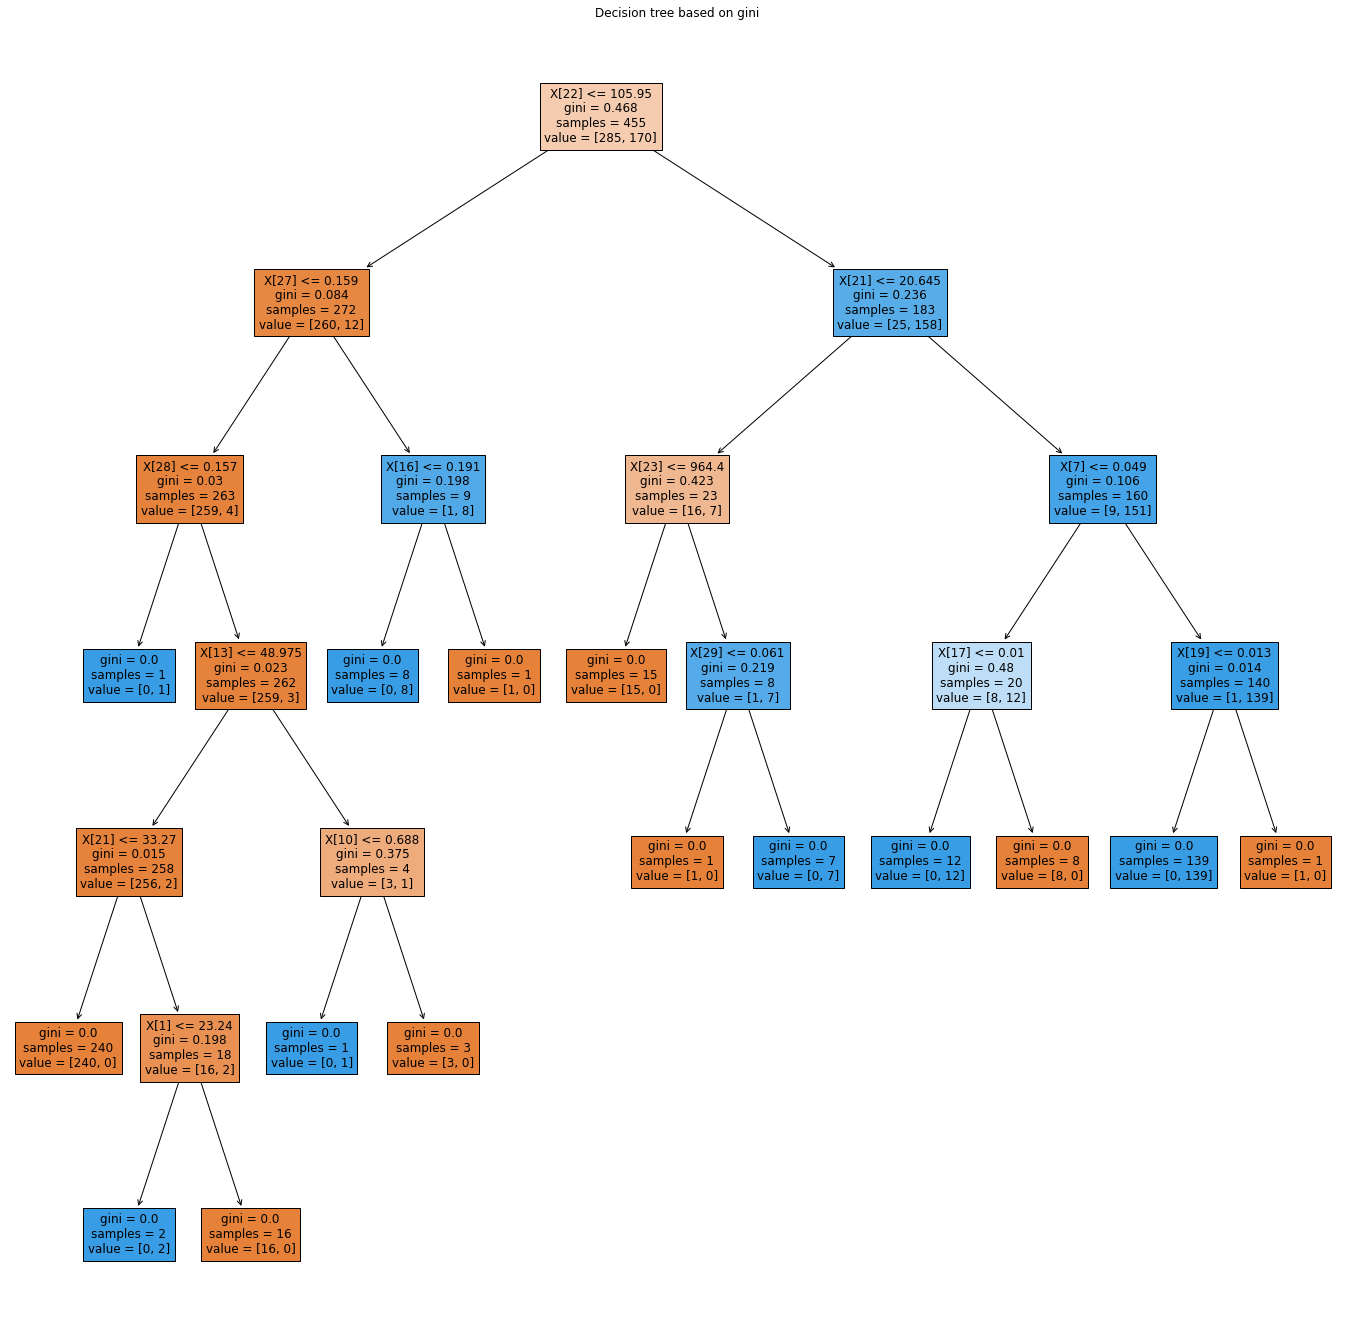

accuracy_gini 0.9298245614035088


In [93]:
from sklearn.tree import plot_tree
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=1)
plt.figure(figsize=(24, 24))
clf_gini=DecisionTreeClassifier(max_depth=6, criterion='gini', random_state=1).fit(X_train,y_train)
plot_tree(clf_gini, filled=True)
plt.title("Decision tree based on gini")
plt.show()
accuracy_gini = accuracy_score(y_test,y_pred)
print( "accuracy_gini "+ str(accuracy_gini))

### 3.3 Exercice 3 : Arbre de régression
Nous allons ici effectuer une régression à partir du jeu de données sur les
véhicules nommé auto-mpg, avec une focale sur la consommation d’essence (variable’miles per gallon’, qui est analogue au nombre de km parcourus par litred’essence). Vous utiliserez les six features disponibles pour réaliser la prédiction. Pour les utilisateurs de R, vous devrez trouver les fonctions équivalentes

#### 1. Importez DecisionTreeRegressor depuis sklearn.tree

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re, seaborn as sns
import plotly.express as px

auto = pd.read_csv("auto-mpg.csv", low_memory = False, encoding = "latin-1")
print( auto.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None


In [117]:
import warnings
warnings.filterwarnings('ignore')

print(auto.horsepower.unique())
auto.horsepower = auto.horsepower.str.replace('?','NaN').astype(float)
auto.horsepower.fillna(auto.horsepower.mean(),inplace=True)
auto.horsepower = auto.horsepower.astype(int)
print(auto.info())

['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int32  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non

In [118]:
auto = auto.drop('car name',axis=1)

# check for duplicates and null values
print('sum of duplicated values: {}\n'.format(auto.duplicated().sum()))
print('sum of null values: {}'.format(auto.isnull().sum()))

sum of duplicated values: 0

sum of null values: mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64


In [106]:
from sklearn.tree import DecisionTreeRegressor

#### 2. Instanciez dt avec la fonction (profondeur maximale de 8, min samples leaf de 0.13), puis entrainez-le sur un jeu d’entrainement que vous aurez créé et nommé comme dans l’exercice 1 (80% des données)

In [108]:
from sklearn.model_selection import train_test_split

X = auto.drop('mpg',axis=1)
y = auto.mpg
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
dt=DecisionTreeRegressor(max_depth=8,min_samples_leaf=0.13,random_state=1)

#### 3.Affichez l’arbre de régression correspondant

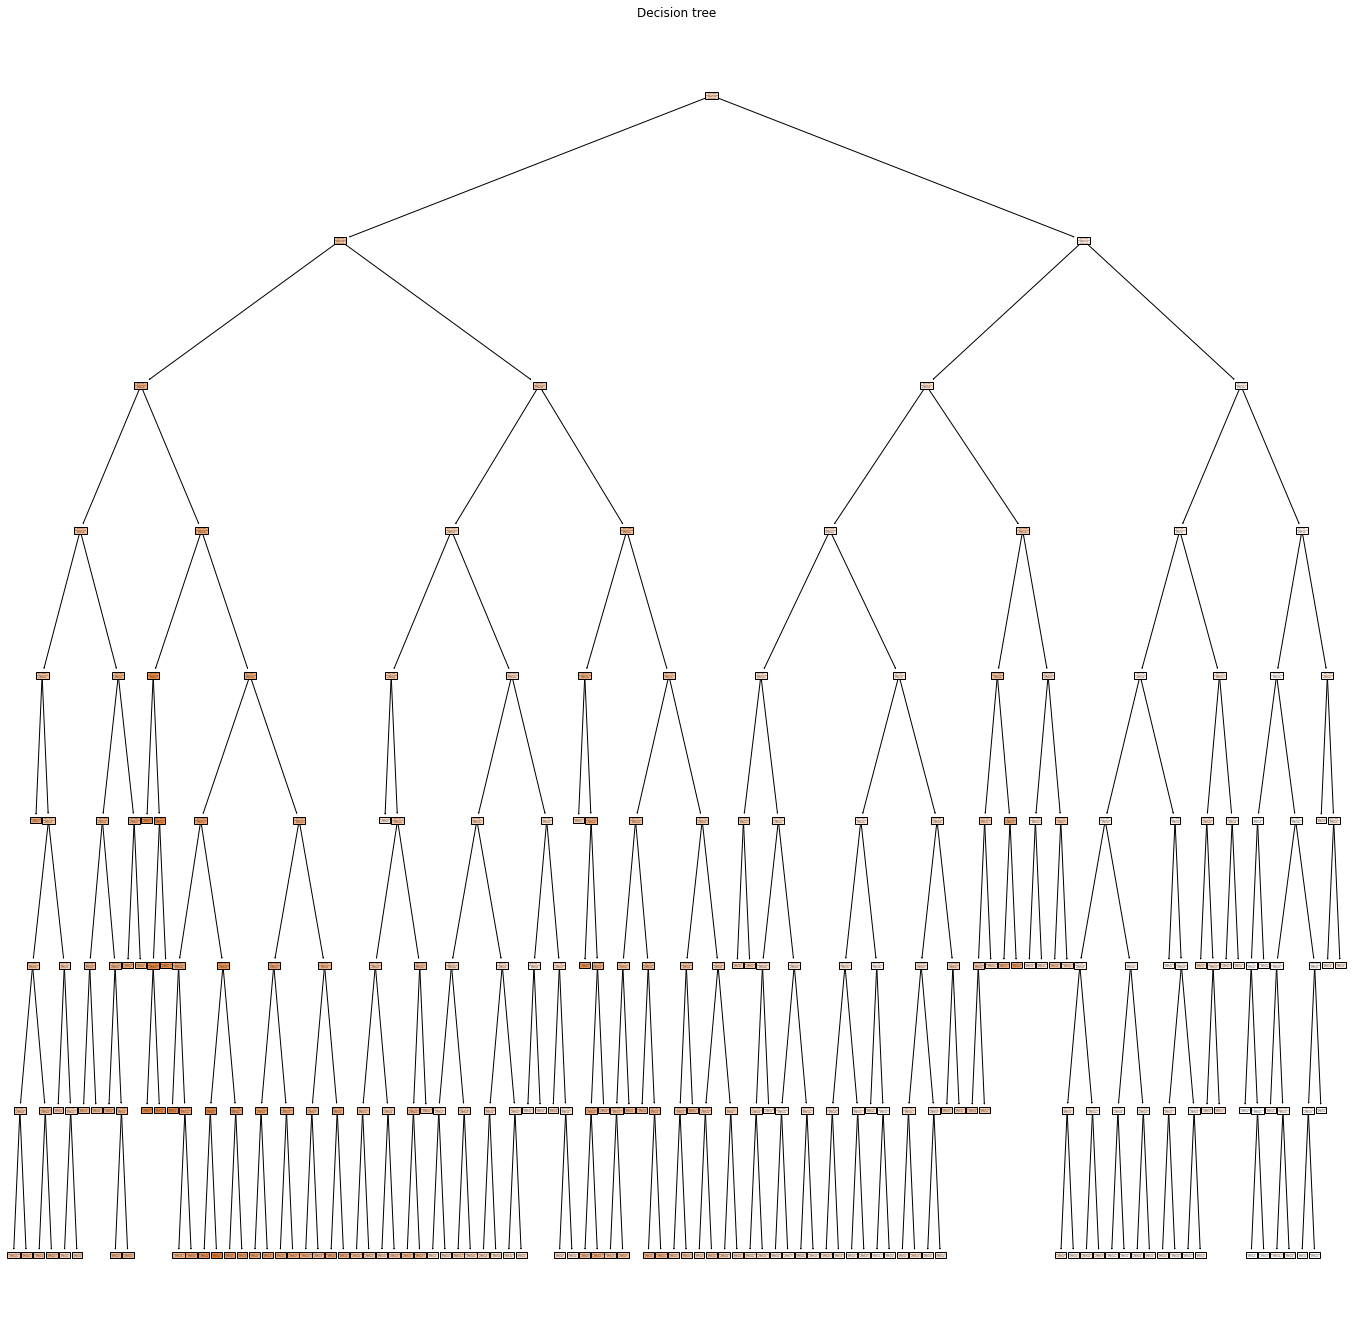

In [110]:
plt.figure(figsize=(24, 24))
clf=DecisionTreeRegressor(max_depth=8, random_state=1).fit(X_train,y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree")
plt.show()

#### 4. Depuis sklearn.metrics importez mean squared error en tant que MSE

In [111]:
from sklearn.metrics import mean_squared_error as MSE

#### 5. Réalisez une prédiction nommée y pred à partir de X test, calculez le MSE puis le RMSE correspondants au modèle à partir de y pred et y test. Pourquoi mobiliser et y pred et y test ? Quel est l’avantage du RMSE par rapport au MSE ?

In [112]:
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
mse_dt=MSE(y_test,y_pred)
rmse_dt=mse_dt**(1/2)
print("mean squared error  "+ str(mse_dt))
print("root mean squared error  "+ str(rmse_dt))

13.295072288649141
3.6462408434782723


#### 6. Calculez le RMSE à partir d’une régression linéaire simple (lr.predict)

In [115]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso  # linear regression models
from sklearn.metrics import r2_score,mean_squared_error 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
model = LinearRegression()  # initialize the LinearRegression model
model.fit(X_train,y_train)  # we fit the model with the training data
linear_pred = model.predict(X_test)
mse_linear=mean_squared_error(y_test,linear_pred)
rmse_linear=mse_linear**(1/2)
print('Mean Squared Error: {}'.format(mse_linear))
print('Root Mean Squared Error: {}'.format(rmse_linear))

Mean Squared Error: 7.65246949797623
Root Mean Squared Error: 2.766309725604895


### 3.4 Exercice 4 : Biais, variance, erreur de généralisation
Nous allons ici nous intéresser à certaines métriques-clé pour estimer la capacité d’un arbre à etre généralisé en dehors du seul jeu de données d’entrainement. Nous allons à nouveau travailler à partir de auto.mpg. Vous trouverez davantage d’informations sur le jeu de données à cette adresse.

#### 1. Rappelez ce à quoi correspondent le biais et la variance, dans un contexte de prédiction. De meme, rappelez le concept de la validation croisée, et comment est calculée l’erreur, par exemple dans un cas de 10 blocs (10 fold). En quoi ces approches permettent-elles de détecter un surentraiınement ?

The bias-variance trade-off. The main idea here is that you want to create models that are as good at prediction as possible but that are still applicable to new data (i.e. they are generalizable). The danger is that you can easily create models that overfit to the local noise in your specific dataset, which isn’t too helpful and leads to poor generalizability since the noise is random and therefore different in each dataset. Essentially, you want to create models that capture only the useful components of a dataset. On the other hand, models that generalize very well but are too inflexible to generate good predictions are the other extreme you want to avoid (this is called underfitting).

Avoid overfitting with cross-validation. You can use k-fold cross validation to get an estimate of model accuracy, and you can use these estimates to tweak your model until you are happy. This lets you leave the test data alone until the very end, thus side-stepping the danger of overfitting to it. In other words, cross-validation provides a way to simulate having more data than you actually have so that you do not have to “spend” your test data until the very end of model building.

#### 2. Divisez les données entre 70% pour l’entraInement et 30% pour le test, en fixant la seed à 1
#### 3. Instanciez un arbre de régression analogue à celui de l’exercice 3, mais en prenant cette fois les valeurs suivantes : max depth=4, min samples leaf=0.26
#### 4. Calculez les scores MSE et RMSE issus de la validation croisée, avec un 10 fold. Tout ceci est effectué sur le jeu de données d’entraInement. Il s’agit ici de la fonction cross val score
#### 5. Evaluez maintenant l’erreur sur le jeu de données d’entraInement, que vous nommerez RMSE train

In [122]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
SEED=1
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=SEED)
dt=DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.26,random_state=SEED)
MSE_CV=-cross_val_score(dt,X_train,y_train,cv=10,scoring='neg_mean_squared_error',n_jobs=-1)
dt.fit(X_train,y_train)
y_predict_train=dt.predict(X_train)
y_predict_test=dt.predict(X_test)


CV MSE:  23.30


In [123]:
print('CV MSE:  {:.2f}'.format(MSE_CV.mean()))
print('Train MSE:  {:.2f}'.format(MSE(y_train,y_predict_train) ))
print('Test MSE:  {:.2f}'.format(MSE(y_test,y_predict_test)))

CV MSE:  23.30
Train MSE:  21.61
Test MSE:  18.77


### 3.5 Exercice 5 : Bagging
Nous allons travailler ici sur un jeu de données portant sur les maladies de foie de patients indiens. Il s’agit d’entrainer un algorithme qui doit déterminer si le patient a ou non un problème au foie. Vous trouverez davantage d’informations sur le jeux de données à cette adresse.

#### 1. Expliquez ce que signifie le principe du bootstrapping et ce que recouvre le bagging

Bootstrapping Is In Effect, Random Sampling With The Substitution Of The Training Data Available. For Each Bootstrapped Dataset, Bagging (= Bootstrap Aggregation) Executes It Several Times And Trains An Estimator.

#### 2.Préparez le jeu de données d’entrainement avec un split 70/30
#### 3. Avec Python, utilisez BaggingClassifier de sklearn.ensemble sur un arbre de décision que vous aurez instancié. Entrainez le modèle, et comparez sa performance (accuracy) avec celle d’un arbre de décision simple


In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re, seaborn as sns
import plotly.express as px

Indi= pd.read_csv("indian_liver_patient.csv", low_memory = False, encoding = "latin-1")
print( Indi.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
None


In [125]:
Indi['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [126]:
print(Indi.isnull().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [127]:
Indi['Albumin_and_Globulin_Ratio']=Indi['Albumin_and_Globulin_Ratio'].fillna(Indi['Albumin_and_Globulin_Ratio'].mean()) 

In [128]:
Indi['Gender']=Indi['Gender'].map({'Male':0,'Female':1})

In [134]:
from sklearn.ensemble import BaggingClassifier
# Split data into 70% train and 30% validation
X =Indi.drop('Dataset', axis=1)
y = Indi['Dataset']


X

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00


In [137]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
dt=DecisionTreeClassifier(max_depth=4,min_samples_leaf=0.16,random_state=1)
bc=BaggingClassifier(base_estimator=dt,n_estimators=300,n_jobs=-1)
bc.fit(X_train,y_train)
y_pred=bc.predict(X_test)
accuracy_bagg=accuracy_score(y_test,y_pred)
print('accuracy of bagging classifier:  {:.3f}'.format(accuracy_bagg))

accuracy of bagging classifier:  0.714


In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
dt=DecisionTreeClassifier(max_depth=4,min_samples_leaf=0.16,random_state=1)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
accuracy_dicision=accuracy_score(y_test,y_pred)
print('accuracy of bagging classifier:  {:.3f}'.format(accuracy_dicision))

accuracy of bagging classifier:  0.726


#### 4. Définissez l’OOB accuracy, et calculez le (oob score en Python)
#### 5. Comparez l’OOB accuracy à l’accuracy du jeu de données test. Quelle est la valeur ajoutée de la première métrique ?

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)
dt=DecisionTreeClassifier(max_depth=4,min_samples_leaf=0.16,random_state=1)
bc=BaggingClassifier(base_estimator=dt,n_estimators=100,oob_score=True,n_jobs=-1)
bc.fit(X_train,y_train)
y_pred=bc.predict(X_test)
test_accuracy=accuracy_score(y_test,y_pred)
oob_accuracy=bc.oob_score_
print('test set accuracy: {:.3f}'.format(test_accuracy))
print('OOB accuracy: {:.3f}'.format(oob_accuracy))

test set accuracy: 0.714
OOB accuracy: 0.706


The two obtained accuracies are pretty close though not exactly equal. These results highlight how OOB-evaluation can be an efficient technique to obtain a performance estimate of a bagged-ensemble on unseen data without performing cross-validation

### 3.6 Exercice 6 : Foret aléatoire
Il va s’agir ici de s’intéresser à la demande de vélos en partage sur un jeu de
données issues de Washington. De nombreux paramètres peuvent jouer sur
la demande : vitesse du vent, risque de pluie, jour férié ou non, etc. Vous
devez prédire la demande à partir d’une foret aléatoire. Les jeux de données
de test et d’entrainement ont déjà été partitionnés. Vous trouverez davantage
d’informations sur le jeux de données à cette adresse.

#### 1.Rappelez l’intéret que présente une foret aléatoire par rapport à une approche classique du bagging. En particulier, comment sont choisies les variables à chaque split ? Quel est l’intéret sous-tendant ce choix ?

Bagging is an ensemble algorithm that fits multiple models on different subsets of a training dataset, then combines the predictions from all models.

Random forest is an extension of bagging that also randomly selects subsets of features used in each data sample. Both bagging and random forests have proven effective on a wide range of different predictive modeling problems.

The fundamental difference is that in Random forests, only a subset of features are selected at random out of the total and the best split feature from the subset is used to split each node in a tree, unlike in bagging where all features are considered for splitting a node.

#### 2. Importez et instanciez RandomForestRegressor à partir de sklearn.ensemble. Appliquez-le sur le jeu de données d’entrainement
#### 3. Utilisez la métrique RMSE pour comparer la performance du modèle avec celle d’un arbre de régression unique

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re, seaborn as sns
import plotly.express as px

bike_test= pd.read_csv("test_bikeshare.csv", low_memory = False, encoding = "latin-1")
print( bike_test.info() )

bike_train= pd.read_csv("train_bikeshare.csv", low_memory = False, encoding = "latin-1")
print(bike_train.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10

In [150]:
bike_train.drop(['casual','registered'],axis=1,inplace=True)

In [151]:
bike_train['datetime']=pd.to_datetime(bike_train['datetime'])
bike_test['datetime'] =pd.to_datetime(bike_test['datetime'])

In [152]:
bike_train['Year'] =bike_train['datetime'].dt.year
bike_train['Month'] =bike_train['datetime'].dt.month
bike_train['Day'] = bike_train['datetime'].dt.day
bike_train['Time'] = bike_train['datetime'].dt.hour
bike_train['DayOfWeek'] = bike_train['datetime'].dt.dayofweek
bike_train['WeekOfYear'] = bike_train['datetime'].dt.isocalendar().week

bike_test['Year'] = bike_test['datetime'].dt.year
bike_test['Month'] =bike_test['datetime'].dt.month
bike_test['Day'] = bike_test['datetime'].dt.day
bike_test['Time'] = bike_test['datetime'].dt.hour
bike_test['DayOfWeek'] = bike_test['datetime'].dt.dayofweek
bike_test['WeekOfYear'] = bike_test['datetime'].dt.isocalendar().week

 
bike_train=bike_train.drop(columns=['datetime'])
bike_test=bike_test.drop(columns=['datetime'])

In [167]:
X = bike_train.drop('count', axis=1)
y=bike_train['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [169]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000,random_state=1)
model.fit(X_train, y_train)
pred=model.predict(X_test)
model.score(X_test, y_test)

0.9532517647682057

In [173]:
rmse_test=MSE(y_test,pred)**(1/2)
print('Test set RMSE of Random Forests model : {:.2f}'.format(rmse_test))

Test set RMSE of Random Forests model : 39.93


In [177]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
mse_dt=MSE(y_test,y_pred)
rmse_dt=mse_dt**(1/2)
print('Test set RMSE of decisiontree regression  '+ str(rmse_dt))


Test set RMSE of decisiontree regression  56.54518253206846


#### 4. Estimez l’importance relative des différents features grace à rf.feature importances ,en créant un vecteur. Pour ce faire, vous mobiliserez pd.Series en Python. Après un tri par ordre décroissant, représentez par un barplot ce vecteur d’importance.


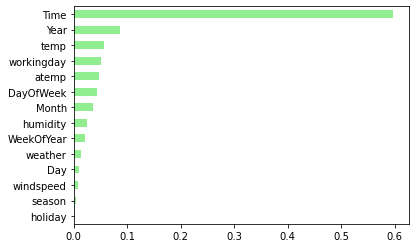

In [181]:
importances_rf=pd.Series(model.feature_importances_,index=X.columns)
sorted_importances_rf=importances_rf.sort_values()
sorted_importances_rf.plot(kind='barh',color='lightgreen')
plt.show()

#### 5. En guise de conclusion, réalisez une courbe d’apprentissage du modèle, ou learning curve en anglais. En d’autres termes, affichez les métriques de performance en fonction du nombre d’échantillons mobilisés pour l’entraînement, en axe des X.

In [196]:
train_sizes=[100,500,1000,2000,3000,4000,5000,7000,8708]
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
features=['Time','Year','temp','workingday','atemp','DayOfWeek','Month','humidity','WeekOfYear']
target='count'
train_sizes, train_scores, validation_scores = learning_curve(
    estimator =LinearRegression() ,X = bike_train[features],
    y = y, train_sizes = train_sizes, cv = 5,scoring = 'neg_mean_squared_error')

train_scores_mean=-train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis =-1 )
print(train_scores_mean)
print(validation_scores_mean)

[ 4587.18141511  4262.06370502  4724.57356483  7094.46521513
  9602.60474629 10535.3554858  12624.87519539 16777.02022943
 19972.4781088 ]
[215474.61699991  53727.97794168  38932.65983432  28484.64150567
  25861.66629442  26085.88516137  25131.88677275  21316.14230829
  21024.89697115]


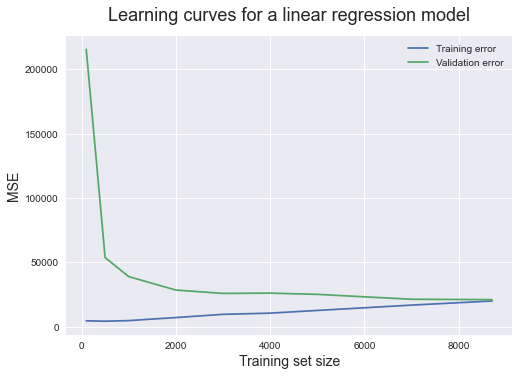

In [197]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()


### 3.7 Exercice 7 : Hyperparamètres et grid search, une introduction
Nous revenons ici sur le jeu de données relatif aux patients indiens. Nous allons cette fois ”tuner” les hyperparamètres du modèle de sorte à améliorer ses performances, à travers une ”Grid search”.

#### 1. Instanciez un arbre en particulier, fondé sur l’indice de Gini, et avec les caractéristiques suivantes : ’min samples leaf’: 1, ’min samples split’: 2, random state’: 1

In [200]:
X =Indi.drop('Dataset', axis=1)
y = Indi['Dataset']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
dt=DecisionTreeClassifier(criterion='gini',min_samples_leaf=1,min_samples_split=2,random_state=1)

#### 2. Définissez deux vecteurs de paramètres sur lesquels nous allons réaliser la Grid search. ’max depth’ : [2, 3, 4], et ’min samples leaf’ : [0.12, 0.14,0.16, 0.18]

In [202]:
from sklearn.ensemble import RandomForestClassifier
param_grid={'max_depth':[2,3,4],'min_samples_leaf':[0.12, 0.14,0.16, 0.18]}
rf_class=RandomForestClassifier(criterion='gini',max_features='auto')


#### 3. Rappelez ce à quoi correspond l’AUC, la sensibilité, et la spécificité d’un modèle. Pour quelles valeurs d’AUC un modèle est-il relativement inutile, ou au contraire très performant ?

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease.

TPR (True Positive Rate) / Recall /Sensitivity=RP/(TP+FN)
Specificity=TN/(TN+FP)

An excellent model has AUC near to the 1 which means it has a good measure of separability. A poor model has an AUC near 0 which means it has the worst measure of separability. In fact, it means it is reciprocating the result. It is predicting 0s as 1s and 1s as 0s. And when AUC is 0.5, it means the model has no class separation capacity whatsoever.

#### 4. Importez GridSearchCV è partir de sklearn.model selection

In [203]:
from sklearn.model_selection import GridSearchCV

#### 5.Instanciez un grid dt à partir de cette dernière fonction. Vous réaliserez une validation croisée à 5 plis, la métrique de performance sera l’AUC

In [206]:
dt=GridSearchCV(estimator=rf_class,param_grid=param_grid,
                           scoring='accuracy',n_jobs=4,cv=5,refit=True,
                           return_train_score=True)

#### 6. Extrayez le meilleur modèle via grid dt.best estimator

In [208]:
dt.fit(X_train,y_train)
dt.predict(X_test)
print( dt.best_estimator_ )

RandomForestClassifier(max_depth=2, max_features='auto', min_samples_leaf=0.14)


#### 7. Prédisez pour le jeu de données test la probabilité de correspondre à un label positif (avoir la maladie du foie), via la fonction suivante y pred proba= best model.predict proba(X test)[:,1]

In [213]:
y_pred_proba= dt.predict_proba(X_test)[:,1]
print(y_pred_proba)

[0.2361568  0.26934891 0.19543239 0.10309477 0.09365155 0.09742785
 0.23643898 0.26086328 0.25941131 0.09601115 0.35615112 0.13575534
 0.42199673 0.41980698 0.18442182 0.35080151 0.0995565  0.34426681
 0.40269507 0.34063132 0.45297083 0.16886375 0.15796545 0.3785745
 0.09023912 0.13284841 0.35818516 0.43198722 0.42203244 0.40662143
 0.28657515 0.13247682 0.45429985 0.29036429 0.37925704 0.30293275
 0.09648779 0.10232365 0.11068904 0.23098942 0.22832568 0.42729618
 0.21855857 0.2215433  0.37026255 0.2031237  0.13630101 0.17495878
 0.40284152 0.32247018 0.33761222 0.20437231 0.16593367 0.16800869
 0.39006135 0.4181543  0.09726272 0.37011262 0.10129306 0.38069121
 0.10922392 0.28896732 0.11712339 0.4398383  0.19767656 0.38501642
 0.25159998 0.45950325 0.37361914 0.35006183 0.38255679 0.42024087
 0.38274345 0.25306847 0.09003036 0.33977326 0.1129346  0.23521961
 0.44900359 0.40966761 0.07994187 0.20965509 0.29007679 0.07994187
 0.4420996  0.34200695 0.25065118 0.43485214 0.09779634 0.32535

#### 8. A partir de y pred proba, y test et de la fonction roc auc score de sklearn.metrics, calculez l’AUC du modèle

In [214]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba)

0.7824

#### 9. Trouvez une méthode pour afficher la matrice de confusion du modèle, ainsi que la courbe ROC. Pour mémoire, nous montrons un exemple de courbe ROC ci-dessous

(array([30.,  7., 13., 17., 16., 12., 11., 32., 19., 18.]),
 array([0.07994187, 0.1180999 , 0.15625793, 0.19441597, 0.232574  ,
        0.27073203, 0.30889007, 0.3470481 , 0.38520614, 0.42336417,
        0.4615222 ]),
 <BarContainer object of 10 artists>)

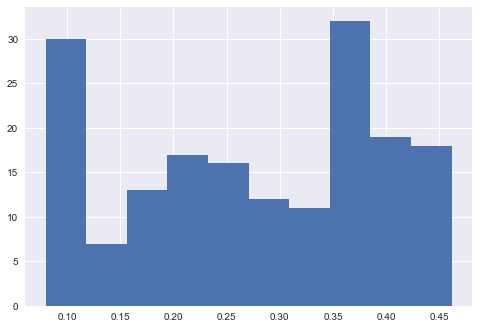

In [232]:
plt.hist(y_pred_proba)


In [252]:
y_pred_proba35= [0 if ele <=0.35 else 1 for ele in y_pred_proba]    
print( sum(y_pred_proba35))

68


In [253]:
y_pred_proba45= [0 if ele <=0.45 else 1 for ele in y_pred_proba]    
print( sum(y_pred_proba45))

6


In [257]:
y_test=y_test.replace(2,0)

In [258]:
table=pd.DataFrame({'Actual':y_test,'Prediction Probability':y_pred_proba,
                   '>0.35':y_pred_proba35,'>0.45':y_pred_proba45 })
print(table)

     Actual  Prediction Probability  >0.35  >0.45
255       1                0.236157      0      0
323       0                0.269349      0      0
65        1                0.195432      0      0
111       1                0.103095      0      0
268       1                0.093652      0      0
..      ...                     ...    ...    ...
429       1                0.170645      0      0
437       1                0.383313      1      0
224       1                0.240744      0      0
128       1                0.200096      0      0
247       1                0.365417      1      0

[175 rows x 4 columns]


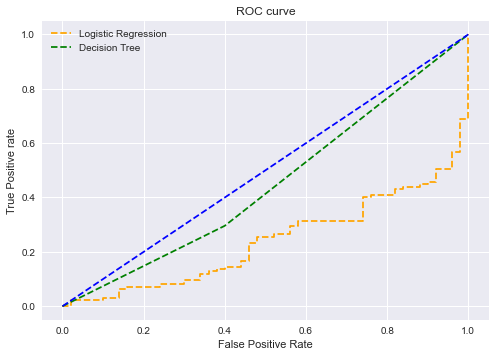

In [266]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

model1 = LogisticRegression()
model1.fit(X_train, y_train)
pred_prob1 = model1.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

dt=DecisionTreeClassifier(criterion='gini',min_samples_leaf=1,min_samples_split=2,random_state=1)
dt.fit(X_train,y_train)
pred_prob=dt.predict_proba(X_test)
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Decision Tree')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

#### 10. Après avoir défini ce que recouvraient la précision et le rappel du modèle,calculez ces métriques de performance

In [269]:
auc_score1 = roc_auc_score(y_test, pred_prob[:,1])
print(auc_score1 )

0.44799999999999995


### 3.8 Exercice 8 : Une grid search en autonomie
Reprenez le jeu de données sur le partage de vélos à Washington.


#### 1. Comme pour l’exercice précédent, effectuez une grid search selon les memes étapes, mais en utilisant cette fois le RMSE, puisque nous effectuons une régression et non une classification. La validation croisée sera de trois folds. Cette fois-ci, voici les paramètres du modèle pris en compte dans la grid search et les valeurs correspondantes : params rf = ’n estimators’:100,350,500 ’max features’:’log2’,’auto’,’sqrt’ ’min samples leaf’:[2,10,30]

In [273]:
X = bike_train.drop('count', axis=1)
y=bike_train['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [275]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf_reg=RandomForestRegressor().fit(X_train,y_train)
prediction = rf_reg.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print(mse)
print(rmse)



1627.294242332415
40.33973527841271


In [278]:
param_grid={'n_estimators':[100,350,500],'max_features':['log2','auto','sqrt'],
           'min_samples_leaf':[2,10,30]}
dt=GridSearchCV(estimator=rf_reg,param_grid=param_grid,
                           scoring='accuracy',n_jobs=-1,cv=3,refit=True,
                           return_train_score=True)


#### 2. Si vous etes sur R avec la fonction randomForest du package randomForest, vous pouvez construire votre grille sur la base des paramètres nodesize (équivalent à min samples leaf), et mtry (équivalent à max features)
#### 3. Expliquez la signification de chacun des paramètres sur lesquels vous effectuez la grid search
#### 4. Prenez le modèle optimal et calculez le RMSE sur le jeu de données test

In [279]:
dt.fit(X_train,y_train)
dt.predict(X_test)
print( dt.best_estimator_ )

RandomForestRegressor(max_features='log2', min_samples_leaf=2)


In [280]:
dt=RandomForestRegressor(max_features='log2', min_samples_leaf=2).fit(X_train,y_train)
prediction = rf_reg.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print(mse)
print(rmse)

1627.294242332415
40.33973527841271
